# Práctica 1

## Problema 1:
Considera los datos de la liga NBA de baloncesto profesional de la temporada 2014-2015 que figuran en el archivo players_stats.csv

In [1]:
##Leemos el dataset
path = file.path("C:", "Users", "sergr", "OneDrive", "Universidad",
                 "MasterDataScience", "NotebooksLocal", "players_stats.csv")
nba = read.csv(file = path, header = TRUE, sep = ",")

a) Representa gráficamente las datos de la columna Height de forma que se aprecie la distribuci
ón de los datos.

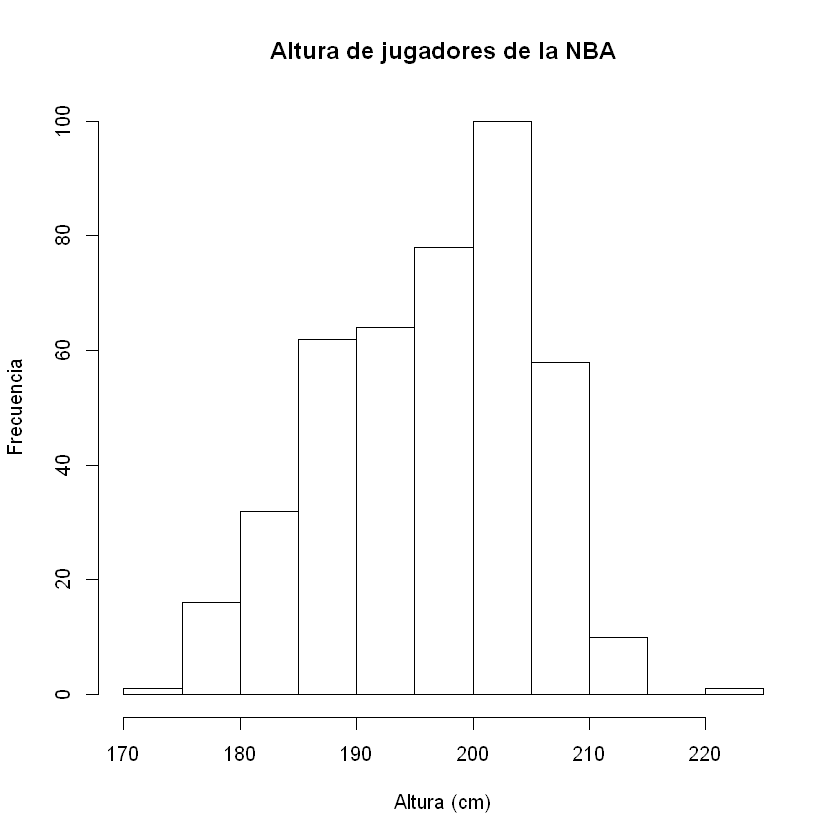

In [2]:
# a) Hacemos el histograma
hist(nba$Height, xlab = "Altura (cm)", ylab= "Frecuencia",
     main = "Altura de jugadores de la NBA")


b) Calcula la media muestral y represéntala mediante una línea en la gráfica.

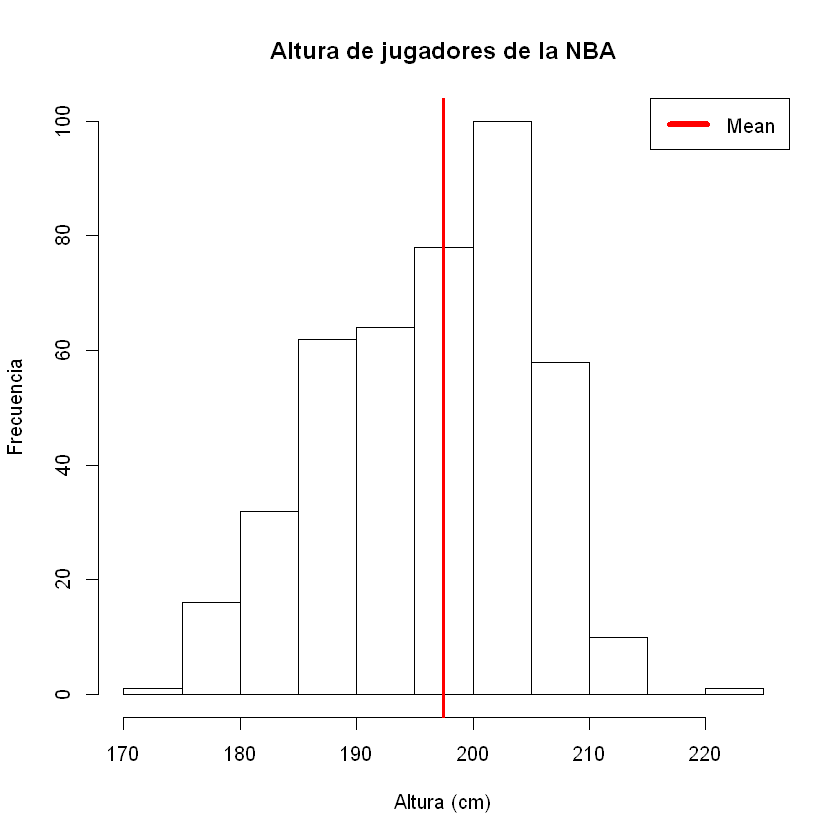

In [3]:
# b) Calculamos la media
meanNba = mean(nba$Height, na.rm = TRUE)
# Ploteamos
hist(nba$Height, xlab = "Altura (cm)", ylab= "Frecuencia",
     main = "Altura de jugadores de la NBA")
abline(v = meanNba, col = "red", lwd = 3)
#Sacamos la leyenda
legend("topright", c("Mean"), col=c("red"), lwd=5)

c) Calcula la desviación típica muestral y representa el intervalo media muestral $\pm$ desviación
típica muestral en la gráfica.

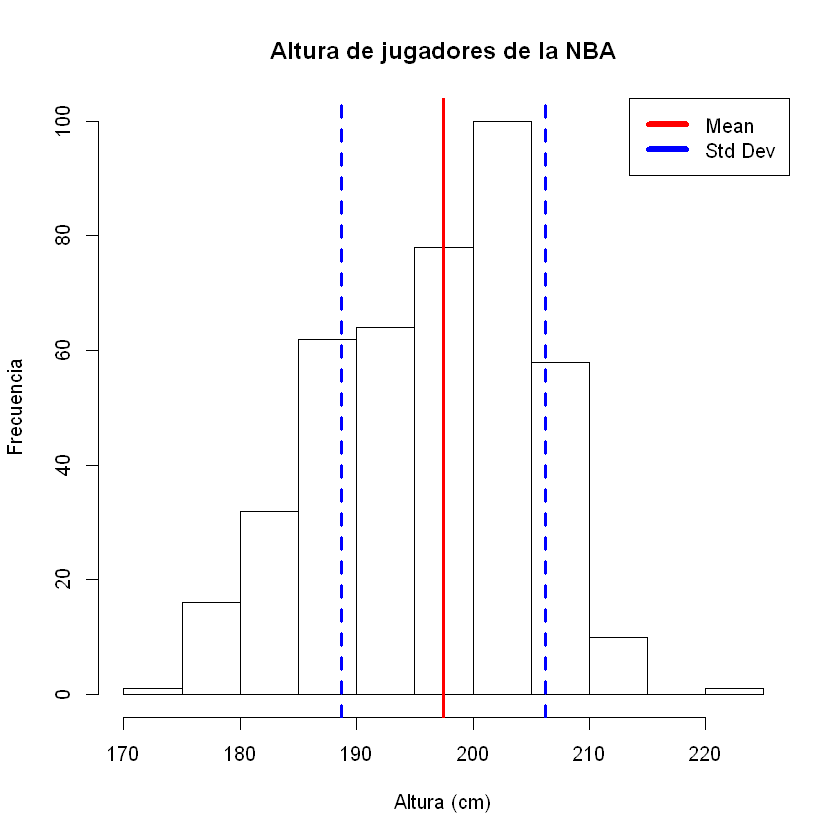

In [4]:
# c) Calculamos la desviación estandar 
stdNba = sd(nba$Height, na.rm = TRUE)

#Ploteamos
hist(nba$Height, xlab = "Altura (cm)", ylab= "Frecuencia",
     main = "Altura de jugadores de la NBA")
abline(v = meanNba, col = "red", lwd = 3)
abline(v = meanNba - stdNba,
       col = "blue", lwd = 3, lty = 2)
abline(v = meanNba + stdNba,
       col = "blue", lwd = 3, lty = 2)

#Sacamos la leyenda
legend("topright", c("Mean", "Std Dev"), col=c("red", "blue"), lwd=5)

d) Comenta brevemente la gráfica

En la gráfica no se puede apreciar ninguna distribución conocida (gaussiana, poissoiniana, etc...) a simple vista. La media se encuentra cerca de los dos metros de altura, y la mayoría de jugadores entran dentro del rango establecido por la desviación estándar $\sigma$.

## Problema 2:
Datos de extensión de hielo ártico.

a) Carga los datos en R. Recomendación: Elimina la segunda línea del archivo

In [5]:
## a) Eliminamos la segunda línea
setwd("C:/Users/sergr/OneDrive/Universidad/MasterDataScience/NotebooksLocal")
all_content <- readLines("N_seaice_extent_daily_v3.0.csv")

skip_second <- all_content[-2]

seaice <- read.csv(textConnection(skip_second))

b) Averigua en qué mes del año suele alcanzarse la extensión máxima y en qué otro mes suele
producirse la extensión mínima.

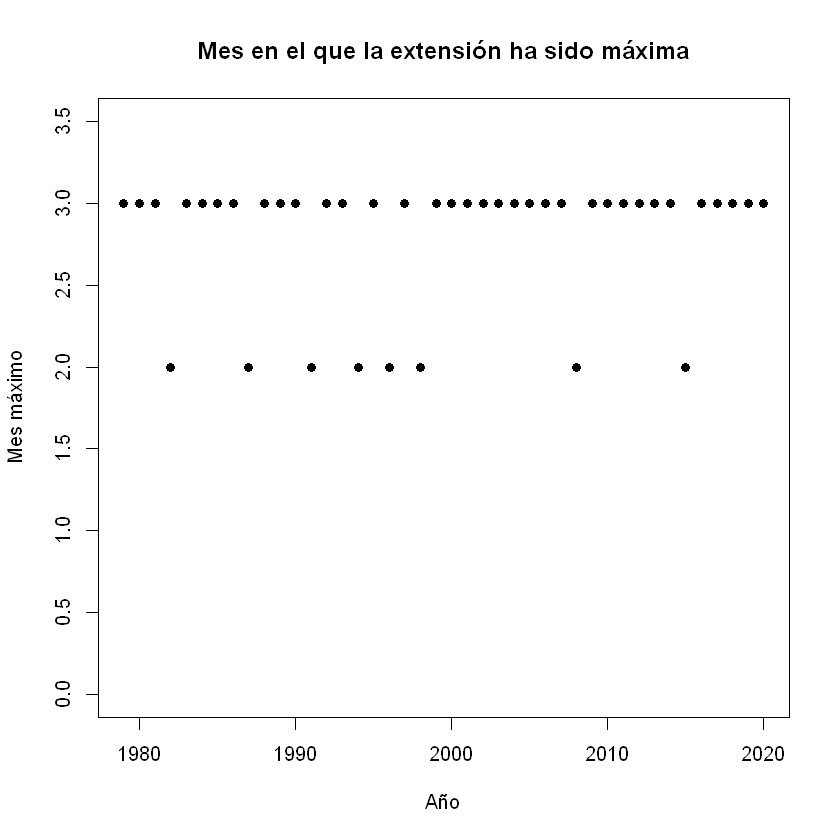

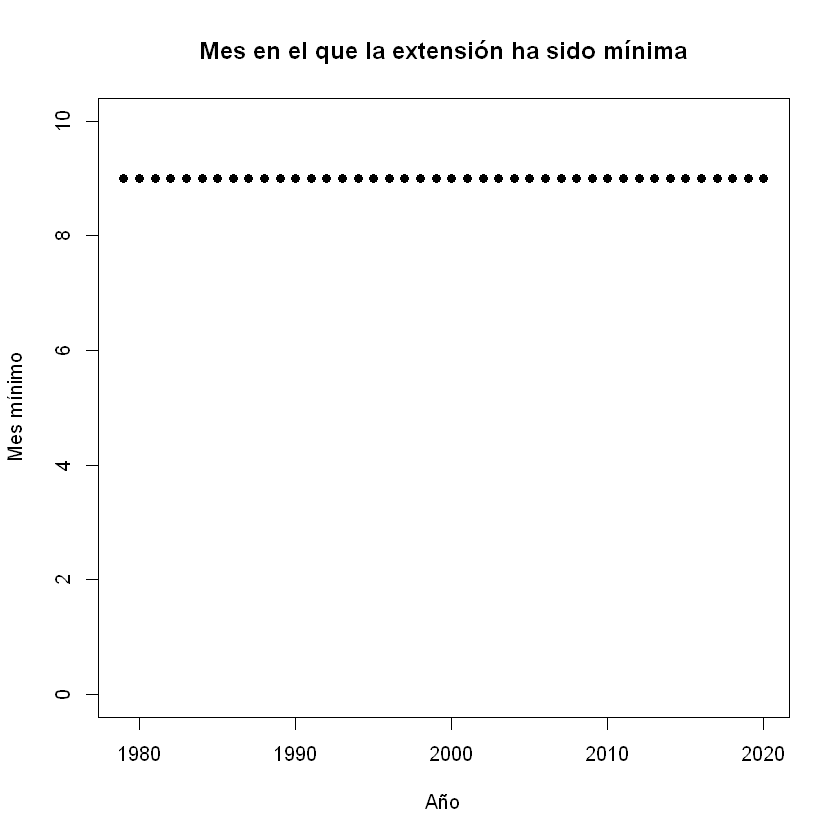

In [6]:
#b) Buscamos los meses cuando la extensión es máxima y mínima para cada año

l = max(seaice$Year) - min(seaice$Year) - 1 #Longitud del vector de resultados 
monthMin = numeric(length = l)
monthMax = numeric(length = l)

years = seq(min(seaice$Year) + 1, max(seaice$Year) - 1) #Ignoramos el primer año (1978)
                                                        #y el último (2011)
                                                        #porque tienen datos incompletos


for(i in years){
  fixedYear = subset(seaice, Year == i)
  monthMin[i - min(seaice$Year)] = fixedYear$Month[which.min(fixedYear$Extent)]
  monthMax[i - min(seaice$Year)] = fixedYear$Month[which.max(fixedYear$Extent)]
}

plot(x = years, y = monthMax, ylim = c(0,3.5), cex = 1, pch = 16,
     xlab = "Año", ylab= "Mes máximo", main = "Mes en el que la extensión ha sido máxima")
plot(x = years, y = monthMin, ylim = c(0,10), cex = 1, pch = 16,
     xlab = "Año", ylab= "Mes mínimo", main = "Mes en el que la extensión ha sido mínima")

Como vemos, la extensión máxima se suele producir en Febrero o Marzo, mientras que la extensión mínima siempre se produce en Septiembre.

c) Representa gráficamente los datos de extensión medianos de cada mes

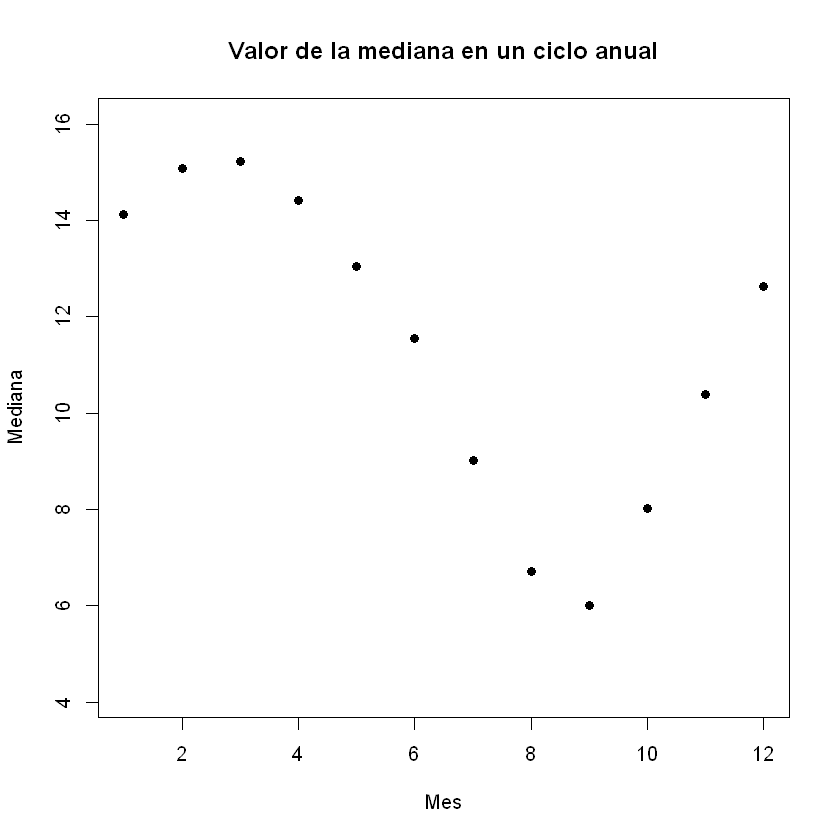

In [7]:
# c) Buscamos los medianos de cada año
months = seq(1,12)
median = numeric(length = 12)
p5 = numeric(length = 12)
p95 = numeric(length = 12)

for (i in months){
  fixedMonth = subset (seaice, Month == i)
  median[i] = median(fixedMonth$Extent)
  p5[i] = quantile(fixedMonth$Extent, 0.05)
  p95[i] = quantile(fixedMonth$Extent, 0.95)
}

plot(months, median, ylim = c(min(p5),max(p95)), cex = 1, pch = 16,
     xlab = "Mes", ylab= "Mediana", main = "Valor de la mediana en un ciclo anual")

d) Añade una región sombreada correspondiente a los percentiles del 5% y 95% de cada mes.

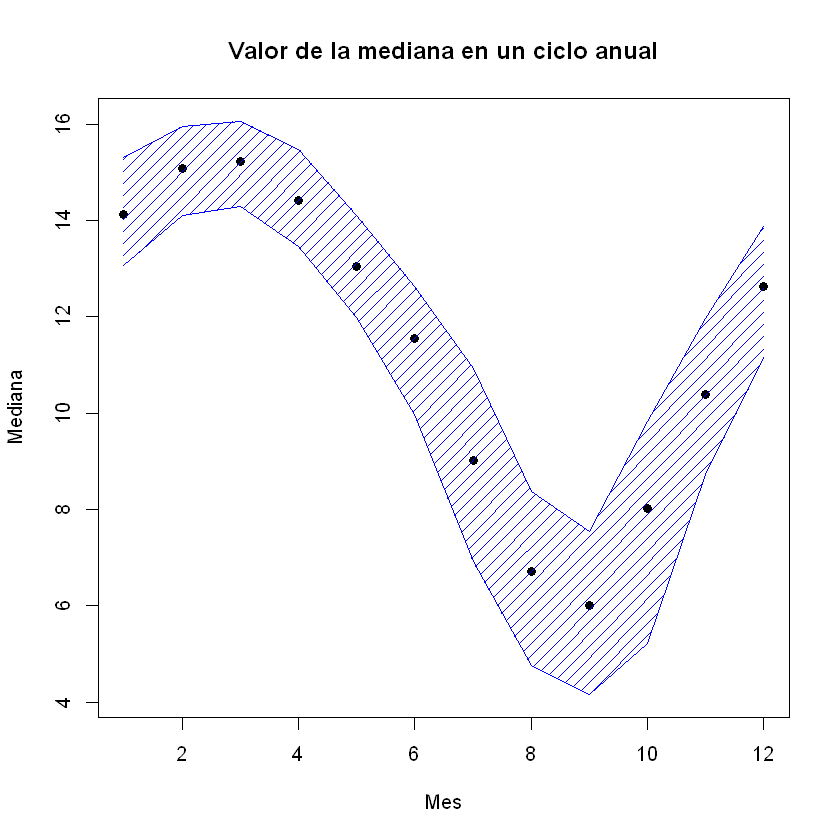

In [8]:
# d) Añadimos región sombreada para los percentiles
p5 = numeric(length = 12)
p95 = numeric(length = 12)

for (i in months){
  fixedMonth = subset (seaice, Month == i)
  p5[i] = quantile(fixedMonth$Extent, 0.05)
  p95[i] = quantile(fixedMonth$Extent, 0.95)
}

plot(months, median, ylim = c(min(p5),max(p95)), cex = 1, pch = 16,
     xlab = "Mes", ylab= "Mediana", main = "Valor de la mediana en un ciclo anual")
lines(months, p5, col = "blue")
lines(months, p95, col = "blue")
polygon(c(months, rev(months)), c(p95,rev(p5)), density = 15, col = "blue", border = NA)


#Para polygon, primero se definen todos los puntos de "arriba" y al llegar al final
#tiene que volver por el eje x para definir los puntos de "abajo", por eso 
#tenemos que poner el reverse()

e) Añade una línea correspondiente a los datos de 2021 y otra para los datos de 2012.

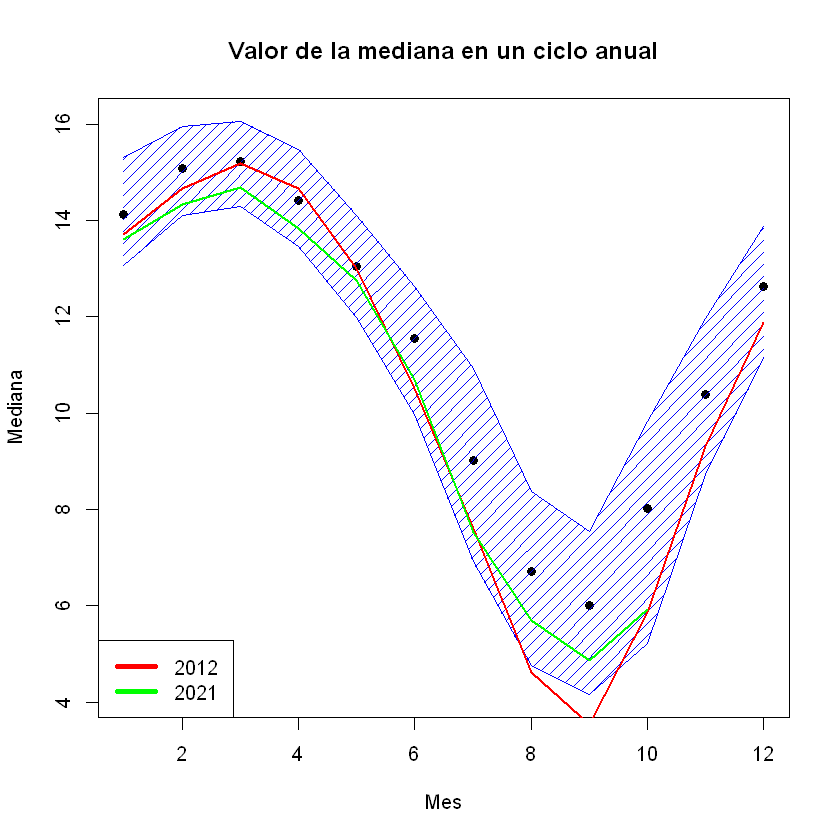

In [9]:
# e) Añadimos datos para 2012 y 2021

y12 = subset(seaice, Year == 2012)
y21 = subset(seaice, Year == 2021)
m12 = c()
m21 = c()
for(i in months){
  fixedMonth12 = subset(y12, Month == i)
  m12[i] = median(fixedMonth12$Extent)
  fixedMonth21 = subset(y21, Month == i)
  m21[i] = median(fixedMonth21$Extent)
}

# Repetimos el plot anterior
plot(months, median, ylim = c(min(p5),max(p95)), cex = 1, pch = 16,
     xlab = "Mes", ylab= "Mediana", main = "Valor de la mediana en un ciclo anual")
lines(months, p5, col = "blue")
lines(months, p95, col = "blue")
polygon(c(months, rev(months)), c(p95,rev(p5)), density = 15, col = "blue", border = NA)

# Ploteamos datos para 2012 y 2021
lines(months, m12, col = "red", lwd = 2)
lines(months, m21, col = "green", lwd = 2)
legend("bottomleft", c("2012", "2021"), col = c("red", "green"), lwd = 4)

f) Comenta brevemente la gráfica

En la gráfica podemos observar como los datos de $\color{green}{\text{2021}}$ caen íntegramente dentro de el rango establecido por los percentiles del 5% y 95%. Sin embargo, los datos de $\color{red}{\text{2012}}$ abandonan el rango en los meses de Agosto y Septiembre. Esto nos indica una anomalía: al ser menor la extensión de hielo en Septiembre en comparación con la dinámica anual, $\color{red}{\text{2012}}$ podría identificarse como "inusualmente cálido" durante esos meses.